In [8]:
import pandas as pd


import matplotlib.pyplot as plt

In [4]:
# Cargar cada archivo de Excel en un DataFrame
df_fy19_fy22 = pd.read_csv("C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\3.datos\\2. datos_estadisticos\\2. CBO_Southwest_land_border_events\\encounter total\\sbo-encounters-fy19-fy22.csv")
df_fy20_fy23 = pd.read_csv("C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\3.datos\\2. datos_estadisticos\\2. CBO_Southwest_land_border_events\\encounter total\\sbo-encounters-fy20-fy23.csv")
df_fy21_fy24 = pd.read_csv("C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\3.datos\\2. datos_estadisticos\\2. CBO_Southwest_land_border_events\\encounter total\\sbo-encounters-fy21-fy24.csv")

# Verificar las primeras filas de cada DataFrame para confirmar la carga
print("FY19-FY22")
print(df_fy19_fy22.head())

print("\nFY20-FY23")
print(df_fy20_fy23.head())

print("\nFY21-FY24")
print(df_fy21_fy24.head())

FY19-FY22
   Fiscal Year Month Grouping Month (abbv)                   Component  \
0         2019           FYTD          AUG  Office of Field Operations   
1         2019           FYTD          DEC          U.S. Border Patrol   
2         2021           FYTD          SEP  Office of Field Operations   
3         2021           FYTD          SEP  Office of Field Operations   
4         2019           FYTD          JUN  Office of Field Operations   

          Demographic Citizenship Grouping Title of Authority Encounter Type  \
0  Accompanied Minors            Guatemala            Title 8  Inadmissibles   
1                FMUA             Honduras            Title 8  Apprehensions   
2       Single Adults                Other            Title 8  Inadmissibles   
3       Single Adults            Guatemala            Title 8  Inadmissibles   
4       Single Adults             Honduras            Title 8  Inadmissibles   

   Encounter Count  
0              0.0  
1           9584.0  
2

In [19]:
df_fy21_fy24.head()

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Citizenship Grouping,Title of Authority,Encounter Type,Encounter Count
0,2021,FYTD,OCT,Office of Field Operations,Accompanied Minors,El Salvador,Title 42,Expulsions,1
1,2021,FYTD,OCT,Office of Field Operations,Accompanied Minors,Guatemala,Title 42,Expulsions,12
2,2021,FYTD,OCT,Office of Field Operations,Accompanied Minors,Honduras,Title 42,Expulsions,4
3,2021,FYTD,OCT,Office of Field Operations,Accompanied Minors,Mexico,Title 42,Expulsions,79
4,2021,FYTD,OCT,Office of Field Operations,Accompanied Minors,Mexico,Title 8,Inadmissibles,11


In [33]:
unique_months = df_fy21_fy24['Month Grouping'].unique()
print(unique_months)

['FYTD']


In [35]:
df_fy24 = df_fy21_fy24[df_fy21_fy24['Fiscal Year'] == 2024]

unique_months_2024 = df_fy24['Month (abbv)'].unique()
print(unique_months_2024)


['APR' 'AUG' 'DEC' 'FEB' 'JAN' 'JUL' 'JUN' 'MAR' 'MAY' 'NOV' 'OCT' 'SEP']


In [20]:
import pandas as pd

# Definir el orden de los meses en inglés abreviado
meses_orden = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Filtrar y agrupar df_fy21_fy24 para obtener todas las filas agrupadas por 'Fiscal Year' y 'Month (abbv)'
df_fy21_fy24_grouped = df_fy21_fy24.groupby(['Fiscal Year', 'Month (abbv)'], as_index=False).agg({'Encounter Count': 'sum'})

# Filtrar y agrupar df_fy20_fy23 solo para el año 2020
df_fy20_fy23_2020 = df_fy20_fy23[df_fy20_fy23['Fiscal Year'] == 2020]
df_fy20_fy23_grouped = df_fy20_fy23_2020.groupby(['Fiscal Year', 'Month (abbv)'], as_index=False).agg({'Encounter Count': 'sum'})

# Filtrar y agrupar df_fy19_fy22 solo para el año 2019
df_fy19_fy22_2019 = df_fy19_fy22[df_fy19_fy22['Fiscal Year'] == 2019]
df_fy19_fy22_grouped = df_fy19_fy22_2019.groupby(['Fiscal Year', 'Month (abbv)'], as_index=False).agg({'Encounter Count': 'sum'})

# Concatenar los DataFrames en el orden de los años, asegurándonos del orden de los meses
df_combined = pd.concat([df_fy19_fy22_grouped, df_fy20_fy23_grouped, df_fy21_fy24_grouped])

# Agregar una columna de orden de meses para facilitar la ordenación
df_combined['Month Order'] = df_combined['Month (abbv)'].apply(lambda x: meses_orden.index(x) + 1)

# Ordenar el DataFrame final por año ascendente y mes en orden de enero a diciembre
df_combined = df_combined.sort_values(by=['Fiscal Year', 'Month Order']).reset_index(drop=True)

# Eliminar la columna 'Month Order' ya que solo se necesitaba para ordenar
df_combined = df_combined.drop(columns=['Month Order'])

# Mostrar las primeras filas del DataFrame final para verificar
print(df_combined.head())


   Fiscal Year Month (abbv)  Encounter Count
0         2019          JAN          58317.0
1         2019          FEB          76545.0
2         2019          MAR         103731.0
3         2019          APR         109415.0
4         2019          MAY         144116.0


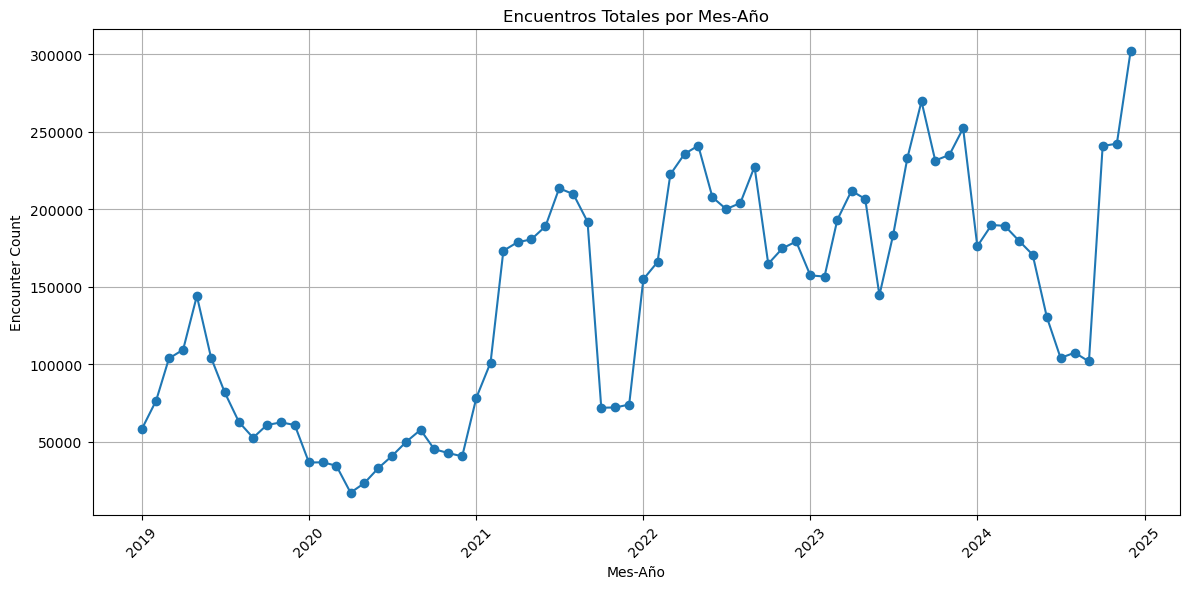

In [21]:
# Crear una columna de fecha combinando 'Fiscal Year' y 'Month (abbv)'
df_combined['Date'] = df_combined['Fiscal Year'].astype(str) + '-' + df_combined['Month (abbv)']
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%Y-%b')

# Crear la gráfica de línea
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Date'], df_combined['Encounter Count'], marker='o', linestyle='-')
plt.title('Encuentros Totales por Mes-Año')
plt.xlabel('Mes-Año')
plt.ylabel('Encounter Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


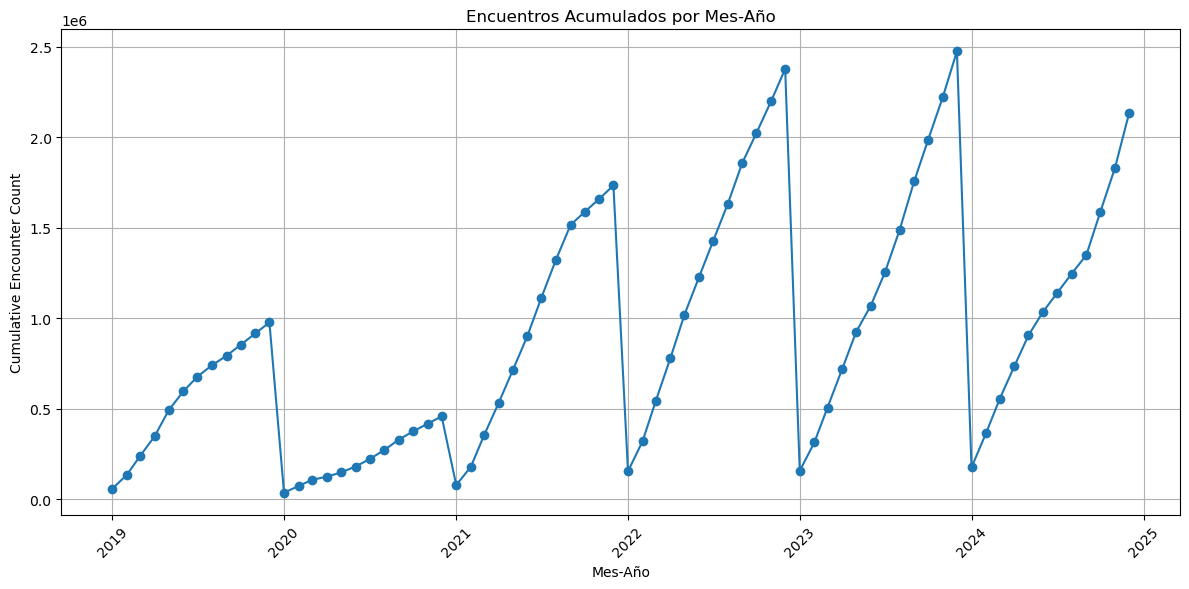

In [22]:
import matplotlib.pyplot as plt

# Crear una columna de fecha combinando 'Fiscal Year' y 'Month (abbv)'
df_combined['Date'] = df_combined['Fiscal Year'].astype(str) + '-' + df_combined['Month (abbv)']
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%Y-%b')

# Calcular el conteo acumulado por año
df_combined['Cumulative Encounter Count'] = df_combined.groupby('Fiscal Year')['Encounter Count'].cumsum()

# Crear la gráfica de línea con los valores acumulados
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Date'], df_combined['Cumulative Encounter Count'], marker='o', linestyle='-')
plt.title('Encuentros Acumulados por Mes-Año')
plt.xlabel('Mes-Año')
plt.ylabel('Cumulative Encounter Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Agrupar por 'Fiscal Year' y sumar 'Encounter Count' para obtener el total anual
df_encounters_per_year = df_combined.groupby('Fiscal Year', as_index=False).agg({'Encounter Count': 'sum'})

# Renombrar la columna para mayor claridad
df_encounters_per_year.rename(columns={'Encounter Count': 'Total Encounter Events'}, inplace=True)

# Mostrar el DataFrame resultante
print(df_encounters_per_year)


   Fiscal Year  Total Encounter Events
0         2019                977509.0
1         2020                458088.0
2         2021               1734686.0
3         2022               2378944.0
4         2023               2475669.0
5         2024               2135005.0


In [25]:
# Crear un nuevo DataFrame con los totales de "Southwest Border Total" y el año fiscal correspondiente
data_totales = {
    'Fiscal Year': [2014, 2015, 2016, 2017, 2018],
    'Southwest Border Total': [479371, 331333, 408870, 303916, 396579]
}
df_southwest_totals = pd.DataFrame(data_totales)

# Combinar el DataFrame con los datos de encounters ya calculados con el nuevo DataFrame de totales de "Southwest Border Total"
df_combined_totals = pd.merge(df_encounters_per_year, df_southwest_totals, on='Fiscal Year', how='outer')



In [26]:
# Llenar los valores NaN en 'Total Encounter Events' con los valores de 'Southwest Border Total'
df_combined_totals['Total Encounter Events'] = df_combined_totals['Total Encounter Events'].fillna(df_combined_totals['Southwest Border Total'])

# Eliminar la columna 'Southwest Border Total' ya que sus valores ya están integrados en 'Total Encounter Events'
df_combined_totals.drop(columns=['Southwest Border Total'], inplace=True)

# Mostrar el DataFrame resultante
print(df_combined_totals)


    Fiscal Year  Total Encounter Events
0          2014                479371.0
1          2015                331333.0
2          2016                408870.0
3          2017                303916.0
4          2018                396579.0
5          2019                977509.0
6          2020                458088.0
7          2021               1734686.0
8          2022               2378944.0
9          2023               2475669.0
10         2024               2135005.0


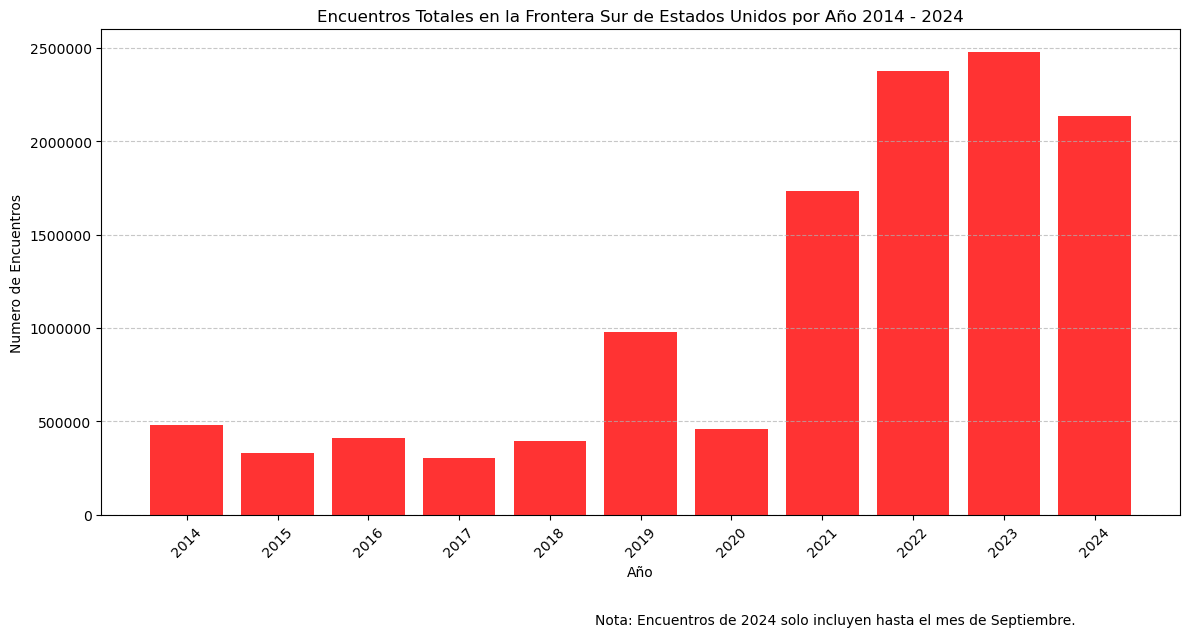

In [36]:

plt.figure(figsize=(12, 6))
plt.bar(df_combined_totals['Fiscal Year'], df_combined_totals['Total Encounter Events'], color='red', alpha=0.8)
plt.title('Encuentros Totales en la Frontera Sur de Estados Unidos por Año 2014 - 2024')
plt.xlabel('Año')
plt.ylabel('Numero de Encuentros')

# Asegurarse de que todos los años aparezcan en los labels del eje x
plt.xticks(df_combined_totals['Fiscal Year'], rotation=45)

# Mostrar los números completos en el eje y sin notación científica
plt.ticklabel_format(style='plain', axis='y')

# Agregar un pie de nota personalizable
plt.figtext(0.7, -0.05, "Nota: Encuentros de 2024 solo incluyen hasta el mes de Septiembre.", ha="center", fontsize=10)

# Agregar una rejilla en el eje y para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [37]:
df_combined_totals

,Fiscal Year,Total Encounter Events
0,2014,479371.0
1,2015,331333.0
2,2016,408870.0
3,2017,303916.0
4,2018,396579.0
5,2019,977509.0
6,2020,458088.0
7,2021,1734686.0
8,2022,2378944.0
9,2023,2475669.0
